In [1]:
import glob
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)



In [2]:
json_dir="231225AutoReasoning/"

json_path_list=glob.glob(json_dir+"*.json")

def load_json(path):
    with open(path,"r") as f:
        d=json.load(f)

    return d

def select_best_reason_record(data):
    min_error = float('inf')
    min_error_dict = None

    for item in data:
        # Prediction(integer)がNoneでないアイテムだけを考慮
        if 'Prediction(integer)' in item:
            # 絶対誤差の計算
            error = abs(item['mpC'] - item['Prediction(integer)'])
            item["Abs error"]=error
            # 最小誤差を更新
            if error < min_error:
                min_error = error
                min_error_dict = item

    return min_error_dict



In [3]:
record_list=[]
for path in json_path_list:
    explanation_records=load_json(path)
    best_record=select_best_reason_record(explanation_records)
    record_list.append(best_record)

In [4]:
record_list=[i for i in record_list if i is not None]

In [5]:
df=pd.DataFrame(record_list)
cols=[ 'name', 'smiles', 'csid', 'link', 'source', 'Reason','mpC',
       'Prediction(integer)',"Abs error" ]
df=df[cols]
df=df[df["Abs error"]<=10]
df=df[df["mpC"]<400]
df.shape
#df.to_csv(json_dir+"0best_reason_record.csv",index=False)

(10762, 9)

<Axes: xlabel='mpC', ylabel='Prediction(integer)'>

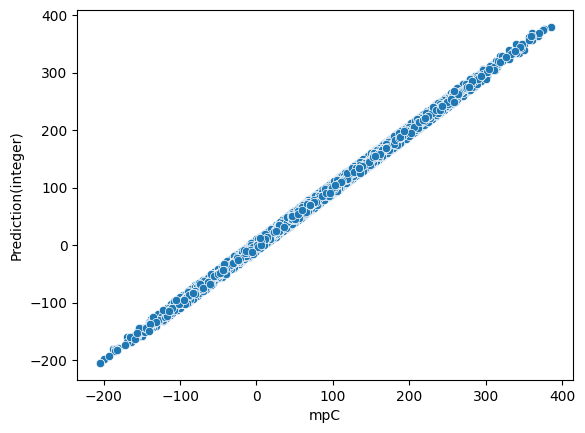

In [6]:
#訓練データのプロット
sns.scatterplot(data=df,x="mpC",y="Prediction(integer)")

In [11]:

#df[:3000].to_csv(json_dir+"240117best_reason_record_3k.csv",index=False)
#df[:10000].to_csv(json_dir+"240117best_reason_record_10k.csv",index=False)
#df[:11000].to_csv(json_dir+"240117best_reason_record_11k.csv",index=False)